In [5]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import json

In [6]:
df = pd.read_csv('dataset.csv')
df[['Author', 'Comments']] = df[['Author', 'Comments']].astype(str).fillna('')
df = df[['Author', 'Comments']]
df.head(100)

# **1. Preprocessing Data**


*   Cleaning Data
*   Case Folding
* Tokenizing
* Stopword Removal
* Stemming
* Feature Extraction



In [7]:
#Mengecek apakah ada data yang duplikat
df = df.drop_duplicates(subset='Comments')
df.duplicated().sum()

np.int64(0)

In [4]:
#Mengecek apakah ada data yang kosong
df = df.dropna()
df.isnull().sum()
df

NameError: name 'df' is not defined

Cleaning Data

In [8]:
# Cleaning Data
def clean_data(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Comments'] = df['Comments'].apply(clean_data)

Case Folding

In [7]:
#Case Folding
df['Comments'] = df['Comments'].str.lower()
df.head(100)

,Author,Comments
0,Whiskey FJ,rick lu anak hasil kondom bocor ya
1,Nafida 0712,kakak itu sokpede
2,rafi ahmad,gg bang slow gw sub kontol eenak
3,Rosli Ishak,apa di tangan mu tatu
4,Dean Dea,muka lo ekk anjing gue rugi nonton youtube lo ...
...,...,...
131,nan,ngakak wkwk jadi org jgn baperan lah wkwk nama...
134,ChikoChan 213,heters itu g punya otak tolollllll otak nya di...
135,DGmrcaption77 gaming,haters adalahhhhh
137,Helle R,maksudnya apaan


In [8]:
# Membuat kamus normalisasi
normalization_dict = {
    "lu": "kamu",
    "lo": "kamu",
    "loe": "kamu",
    "gw": "aku",
    "gg": "keren",
    "gak": "tidak",
    "ga": "tidak",
    "gk": "tidak",
    "tdk": "tidak",
    "bgt": "sekali",
    "tp": "tapi",
    "tpi": "tapi",
    "t'pi": "tapi",
    "erickontol": "erick kontol",
    "sy": "saya",
    "aq": "aku",
    "udh": "sudah",
    "sdh": "sudah",
    "blm": "belum",
    "belom": "belum",
    "sm": "sama",
    "sama2": "sama-sama",
    "kpn": "kapan",
    "gmn": "bagaimana",
    "bgs": "bagus",
    "bagusss": "bagus",
    "jgn": "jangan",
    "jngn": "jangan",
    "bs": "bisa",
    "bisaa": "bisa",
    "msh": "masih",
    "masihhh": "masih",
    "msih": "masih",
    "krn": "karena",
    "karna": "karena",
    "kalo": "kalau",
    "klo": "kalau",
    "kl": "kalau",
    "nih": "ini",
    "tuh": "itu",
    "dgn": "dengan",
    "dg": "dengan",
    "dr": "dari",
    "dri": "dari",
    "dlm": "dalam",
    "dlam": "dalam",
    "utk": "untuk",
    "untk": "untuk",
    "unt": "untuk",
    "trs": "terus",
    "trus": "terus",
    "sgt": "sangat",
    "sdng": "sedang",
    "sdg": "sedang",
    "sblumnya": "sebelumnya",
    "sbg": "sebagai",
    "sbagai": "sebagai",
    "bbrp": "beberapa",
    "bbrapa": "beberapa",
    "mrk": "mereka",
    "mreka": "mereka",
    "gue": "aku",
    "km": "kamu",
    "kek": "seperti",
    "ekk": "seperti",
    "kyk": "seperti",
    "kayak": "seperti",
    "apaan": "apa",
    "gimana": "bagaimana",
    "knapa": "kenapa",
    "nggak": "tidak",
    "ngga": "tidak",
    "iyaa": "iya",
    "iyaaa": "iya",
    "dongg": "dong",
    "tauu": "tahu",
    "tauuu": "tahu",
    "bangettt": "sekali",
    "guanteng": "tampan",
  "sokpede": "sok pede",
  "subcribe": "subscribe",
  "subs": "subscribe",
  "sub": "subscribe",
  "anjingggggg": "anjing",
  "anjinggggg": "anjing",
  "bgsd": "bangsat",
  "ngacok": "ngaco",
  "ntol": "kontol",
  "bodoamat": "bodoh amat",
  "gak": "tidak",
  "bngt": "banget",
  "ngent": "ngentot",
  "ngakak": "tertawa",
  "ngjulur": "menjulur",
  "tatu": "tato",
  "hater": "pembenci",
  "heters": "para pembenci",
  "begok": "bodoh",
  "nyesel": "menyesal",
}


def normalize(text):
    for word, replacement in normalization_dict.items():
        pattern = r'\b' + re.escape(word) + r'\b'
        text = re.sub(pattern, replacement, text)
    return text

df['Comments'] = df['Comments'].astype(str).apply(lambda x: normalize(x))
df.head(100)

,Author,Comments
0,Whiskey FJ,rick kamu anak hasil kondom bocor ya
1,Nafida 0712,kakak itu sok pede
2,rafi ahmad,keren bang slow aku subscribe kontol eenak
3,Rosli Ishak,apa di tangan mu tato
4,Dean Dea,muka kamu seperti anjing aku rugi nonton youtu...
...,...,...
131,nan,tertawa wkwk jadi org jangan baperan lah wkwk ...
134,ChikoChan 213,para pembenci itu g punya otak tolollllll otak...
135,DGmrcaption77 gaming,haters adalahhhhh
137,Helle R,maksudnya apa


Stopword Removal

In [9]:
# Menghilangkan kata-kata stop (stopwords) menggunakan Sastrawi
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['yang', 'v', 'sih', 'kan', 'loh', 'duh', 'wah']

# Membuat daftar kata-kata stop bawaan
stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

# Membuat kamus baru menggunakan daftar kata-kata stop yang diperluas
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

# Fungsi untuk menghapus kata-kata stop dari sebuah string
def stopword_removal(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['Comments'] = df['Comments'].apply(lambda x: stopword_removal(x))
df.head()

,Author,Comments
0,Whiskey FJ,rick kamu anak hasil kondom bocor
1,Nafida 0712,kakak sok pede
2,rafi ahmad,keren bang slow aku subscribe kontol eenak
3,Rosli Ishak,apa tangan mu tato
4,Dean Dea,muka kamu anjing aku rugi nonton youtube kamu ...


In [9]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from spellchecker import SpellChecker

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text_cleaning)

df['Stemmed_Comments'] = df['Comments'].astype(str).apply(stemming)
df['Stemmed_Comments'].to_csv('executed.csv', index=False, encoding='latin1')
df = pd.read_csv('executed.csv', encoding='latin1')
df

,Author,Comments
0,Whiskey FJ,rick lu anak hasil kondom bocor ya
1,Nafida 0712,kakak itu sokpede
2,rafi ahmad,gg bang slow gw sub kontol eenak
3,Rosli Ishak,apa di tangan mu tatu
4,Dean Dea,muka lo ekk anjing gue rugi nonton youtube lo ...
...,...,...
93,Odek Divayana,terbaik erickolimsalam dri balriber lu fans lu...
94,Axel Raihan,good erick
95,Tlarap ijo,bank erickolim gimana rasa nya coli pertama ab...
97,limv h,bang lu bikin collab sama kimi hime pasti view...


Tokenize

In [11]:
# Tokenize
df['Tokenized_Comments'] = df['Stemmed_Comments'].astype(str).apply(lambda x:x.split())
df

,Stemmed_Comments,Tokenized_Comments
0,rick kamu anak hasil kondom bocor,"[rick, kamu, anak, hasil, kondom, bocor]"
1,kakak sok pede,"[kakak, sok, pede]"
2,keren bang slow aku subscribe kontol eenak,"[keren, bang, slow, aku, subscribe, kontol, ee..."
3,apa tangan mu tato,"[apa, tangan, mu, tato]"
4,muka kamu anjing aku rugi nonton youtube kamu ...,"[muka, kamu, anjing, aku, rugi, nonton, youtub..."
...,...,...
10632,awal mula yutuber suksess,"[awal, mula, yutuber, suksess]"
10633,aihh sedih tukang numpang promosi tolol bego g...,"[aihh, sedih, tukang, numpang, promosi, tolol,..."
10634,mampir chanelku yg suka bokeb,"[mampir, chanelku, yg, suka, bokeb]"
10635,makasih,[makasih]


**Translate**

In [12]:
%pip install translate

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Ini yang indo ke indo
from translate import Translator

def translate_id(text):
    try:
        translator = Translator(to_lang="id", from_lang='id')
        translation = translator.translate(text)
        return translation
    except Exception as e:
        print(f"Error in translation: {e}")
        return text

df['Stemmed_Comments'] = df['Stemmed_Comments'].astype(str).dropna()
df['ID_Comments'] = df['Stemmed_Comments'].apply(translate_id)
df[['ID_Comments']].to_csv('D:/(( Kuliah UMS ))/Semester 7/Skripsi/code/serius/TranslatedSampleID.csv')

In [14]:
data = pd.read_csv('D:/(( Kuliah UMS ))/Semester 7/Skripsi/code/serius/TranslatedSampleID.csv', encoding='latin1')
print(data.head())

   Unnamed: 0                                        ID_Comments
0           0                  rick kamu anak hasil kondom bocor
1           1                                     kakak sok pede
2           2         keren bang slow aku subscribe kontol eenak
3           3                                 apa tangan mu tato
4           4  muka kamu anjing aku rugi nonton youtube kamu ...


In [15]:
%pip install preprocessor
%pip install textblob
%pip install wordcloud
%pip install nltk

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
data = pd.read_csv('D:/(( Kuliah UMS ))/Semester 7/Skripsi/code/serius/TranslatedSampleID.csv', encoding='latin1')
data.head()

,Unnamed: 0,ID_Comments
0,0,rick kamu anak hasil kondom bocor
1,1,kakak sok pede
2,2,keren bang slow aku subscribe kontol eenak
3,3,apa tangan mu tato
4,4,muka kamu anjing aku rugi nonton youtube kamu ...


# **2. Labeling**

In [18]:
#opsi 1
dl = pd.read_csv('TranslatedSampleID.csv')
dl.dropna()

,Unnamed: 0,ID_Comments
0,0,rick kamu anak hasil kondom bocor
1,1,kakak sok pede
2,2,keren bang slow aku subscribe kontol eenak
3,3,apa tangan mu tato
4,4,muka kamu anjing aku rugi nonton youtube kamu ...
...,...,...
10632,10632,awal mula yutuber suksess
10633,10633,aihh sedih tukang numpang promosi tolol bego g...
10634,10634,mampir chanelku yg suka bokeb
10635,10635,makasih


In [19]:
with open('kamus_kasar.json', 'r') as file:
    kamus = json.load(file)

def labeling(text, kamus):
    words = set(text.split())
    kata_kasar = set(kamus.keys())  
    if words & kata_kasar:
        return 'kasar'
    else:
        return 'tidak kasar'
    
df['labeling'] = df['Stemmed_Comments'].astype(str).apply(lambda x: labeling(x, kamus))

# df_kasar = dl[dl['labeling'] == 'kasar']
# print(df_kasar)

df.to_csv('executed.csv', encoding='latin1')

# print(df[['Stemmed_Comments', 'labeling']])
df

,Stemmed_Comments,Tokenized_Comments,ID_Comments,labeling
0,rick kamu anak hasil kondom bocor,"[rick, kamu, anak, hasil, kondom, bocor]",rick kamu anak hasil kondom bocor,tidak kasar
1,kakak sok pede,"[kakak, sok, pede]",kakak sok pede,tidak kasar
2,keren bang slow aku subscribe kontol eenak,"[keren, bang, slow, aku, subscribe, kontol, ee...",keren bang slow aku subscribe kontol eenak,kasar
3,apa tangan mu tato,"[apa, tangan, mu, tato]",apa tangan mu tato,tidak kasar
4,muka kamu anjing aku rugi nonton youtube kamu ...,"[muka, kamu, anjing, aku, rugi, nonton, youtub...",muka kamu anjing aku rugi nonton youtube kamu ...,kasar
...,...,...,...,...
10632,awal mula yutuber suksess,"[awal, mula, yutuber, suksess]",awal mula yutuber suksess,tidak kasar
10633,aihh sedih tukang numpang promosi tolol bego g...,"[aihh, sedih, tukang, numpang, promosi, tolol,...",aihh sedih tukang numpang promosi tolol bego g...,kasar
10634,mampir chanelku yg suka bokeb,"[mampir, chanelku, yg, suka, bokeb]",mampir chanelku yg suka bokeb,tidak kasar
10635,makasih,[makasih],makasih,tidak kasar


Membagi dataset

In [20]:
from sklearn.model_selection import train_test_split

X = df['Stemmed_Comments'].astype(str).dropna() 
y = df['labeling']           

# Membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


Jumlah data latih: 8509
Jumlah data uji: 2128


In [21]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Transformasi teks menjadi fitur TF-IDF
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Dimensi X_train_tfidf: {X_train_tfidf.shape}")
print(f"Dimensi X_test_tfidf: {X_test_tfidf.shape}")


Dimensi X_train_tfidf: (8509, 8579)
Dimensi X_test_tfidf: (2128, 8579)


In [23]:
with open('kamus_kasar.json', 'r') as file:
    kamus = json.load(file)

kata_kasar = set(kamus.keys())

def filter_kata_kasar(text, kamus_keys):
    words = str(text).split()  # Memastikan teks diubah menjadi string dan di-split
    filtered_words = [word for word in words if word in kamus_keys]
    return ' '.join(filtered_words)  # Mengembalikan kata-kata kasar sebagai string

df['Filtered_Comments'] = df['Stemmed_Comments'].apply(lambda x: filter_kata_kasar(x, kata_kasar))
df.to_csv('executed.csv', index=False, encoding='latin1')
# df[['Stemmed_Comments', 'Filtered_Comments']]
df

,Stemmed_Comments,Tokenized_Comments,ID_Comments,labeling,Filtered_Comments
0,rick kamu anak hasil kondom bocor,"[rick, kamu, anak, hasil, kondom, bocor]",rick kamu anak hasil kondom bocor,tidak kasar,
1,kakak sok pede,"[kakak, sok, pede]",kakak sok pede,tidak kasar,
2,keren bang slow aku subscribe kontol eenak,"[keren, bang, slow, aku, subscribe, kontol, ee...",keren bang slow aku subscribe kontol eenak,kasar,kontol
3,apa tangan mu tato,"[apa, tangan, mu, tato]",apa tangan mu tato,tidak kasar,
4,muka kamu anjing aku rugi nonton youtube kamu ...,"[muka, kamu, anjing, aku, rugi, nonton, youtub...",muka kamu anjing aku rugi nonton youtube kamu ...,kasar,anjing anjing
...,...,...,...,...,...
10632,awal mula yutuber suksess,"[awal, mula, yutuber, suksess]",awal mula yutuber suksess,tidak kasar,
10633,aihh sedih tukang numpang promosi tolol bego g...,"[aihh, sedih, tukang, numpang, promosi, tolol,...",aihh sedih tukang numpang promosi tolol bego g...,kasar,tolol bego bangsat
10634,mampir chanelku yg suka bokeb,"[mampir, chanelku, yg, suka, bokeb]",mampir chanelku yg suka bokeb,tidak kasar,
10635,makasih,[makasih],makasih,tidak kasar,


Hitung Skor TF-IDF per kata kasar

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

def filter_kata_kasar(text, kata_kasar):
    words = str(text).split()
    filtered_words = [word for word in words if word in kata_kasar]
    return ' '.join(filtered_words)

vectorizer = TfidfVectorizer()

# Hitung tf-idf bagian kata kasar saja
tfidf_matrix = vectorizer.fit_transform(df['Filtered_Comments'])

# Perhitungan skor tf-idf untuk setiap kata kasar
features = vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray()

data = []
for doc_idx, doc_scores in enumerate(scores):
    tokens = [features[i] for i in range(len(features)) if doc_scores[i] > 0]
    tfidf_scores = [round(doc_scores[i], 2) for i in range(len(features)) if doc_scores[i] > 0]
    
    # Untuk setiap kata dan skor, akan dibuat baris baru
    for token, score in zip(tokens, tfidf_scores):
        data.append({"Comments": token, "TF-IDF": score})

df_tfidf = pd.DataFrame(data)
df_tfidf = df_tfidf[df_tfidf['Comments'].str.len() > 0].dropna().drop_duplicates(subset='Comments')
df_tfidf.to_csv("skor_tfidf.csv", index=False)
df = pd.read_csv("skor_tfidf.csv", encoding='latin1')
df

,Comments,TF-IDF
0,kontol,1.00
1,anjing,1.00
6,babi,0.66
8,memek,0.52
11,goblok,0.36
...,...,...
2778,perek,0.86
2801,bangkai,1.00
3037,tuyul,0.80
3102,wong,1.00


Evaluasi Model

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words_id = list(set(stopwords.words('indonesian')))

data = pd.read_csv('executed.csv')
data = data.dropna(subset=['Stemmed_Comments', 'labeling'])
print(data.isnull().sum())

encoder = LabelEncoder()
y = encoder.fit_transform(data['labeling'])
X = data['Stemmed_Comments']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hitung tf-idf nya
vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=2,
    max_df=0.95,
    stop_words=stop_words_id
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()

# Percobaan pakai data latih
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


Stemmed_Comments         0
Tokenized_Comments       0
ID_Comments              0
labeling                 0
Filtered_Comments     7766
dtype: int64
Akurasi: 0.9219
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       562
           1       0.91      0.99      0.95      1563

    accuracy                           0.92      2125
   macro avg       0.94      0.86      0.89      2125
weighted avg       0.93      0.92      0.92      2125

[[ 405  157]
 [   9 1554]]


# **3. Word Replacement**

In [11]:
with open('kamus_kasar.json', 'r') as file:
    kamus = json.load(file)

kata_kasar = set(kamus)

def replace_kata_kasar(text, kamus):
    words = text.split()  
    word_replacement = [kamus[key] if key in kamus else key for key in words]
    return ' '.join(word_replacement)

df = pd.read_csv('executed.csv')
df['Fixed_Comments']=df['Stemmed_Comments'].astype(str).apply(lambda x: replace_kata_kasar(x, kamus))
# df.to_csv('executed.csv', encoding='latin1')
df[['Stemmed_Comments', 'Fixed_Comments']]
df[['Stemmed_Comments', 'Fixed_Comments']].to_csv('hasil.csv', encoding='latin1')

dfc = pd.read_csv('hasil.csv')
dfc


# **Eksekusi dalam input**

In [19]:
def execute(word):
    word = clean_data(word)
    word = normalize(word)
    word = stemming(word)
    word = translate_id(word)
    word = replace_kata_kasar(word, kamus)
    print(word)

contoh = 'Dasar manusia tolol'
execute(contoh)

dasar manusia tidak pengertian


Visualisasi

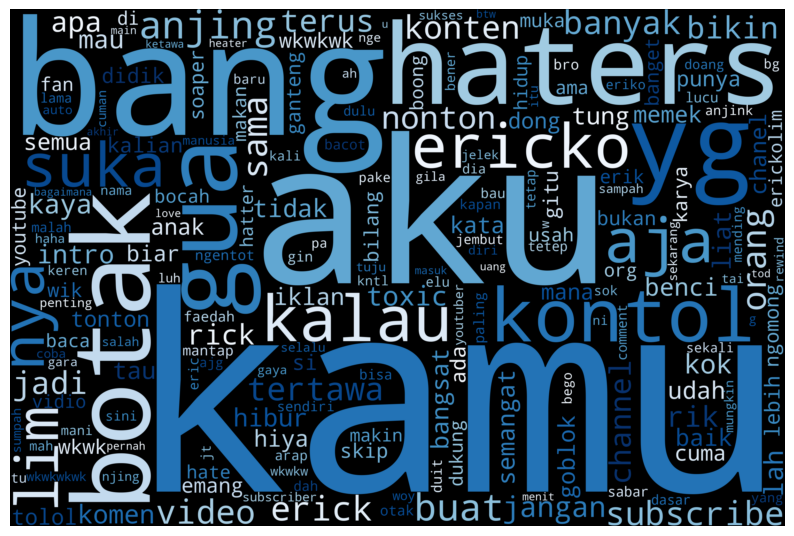

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk membuat dan menampilkan word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Menggabungkan semua teks dari kolom 'Comments'
all_words = ' '.join([tweets for tweets in df['Stemmed_Comments'].astype(str)])

# Membuat objek WordCloud
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

# Memanggil fungsi untuk menampilkan word cloud
plot_cloud(wordcloud)
